# 앤스콤 데이터 집합 불러오기

In [3]:
import seaborn as sns

anscombe = sns.load_dataset("anscombe")
print(anscombe.head())
print(type(anscombe))

  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33
<class 'pandas.core.frame.DataFrame'>


# matplotlib 라이브러리로 간단한 그래프 그리기

In [4]:
import matplotlib.pyplot as plt

# 첫 번째 데이터 그룹 추출
dataset_1 = anscombe[anscombe['dataset']=='I']

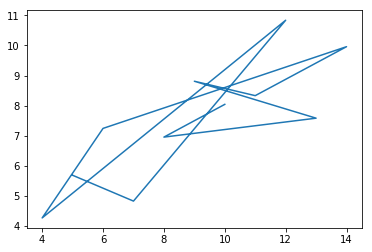

In [5]:
plt.plot(dataset_1['x'],dataset_1['y'])

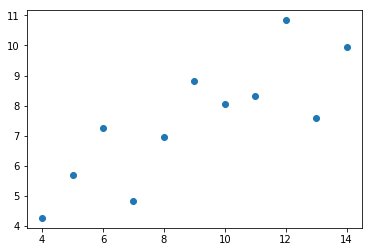

In [7]:
plt.plot(dataset_1.x,dataset_1.y,'o')

# 한 번에 4개의 그래프 그리기

In [8]:
# 데이터 불린 추출
dataset_2 = anscombe[anscombe.dataset=='II']
dataset_3 = anscombe[anscombe.dataset=='III']
dataset_4 = anscombe[anscombe.dataset=='IV']

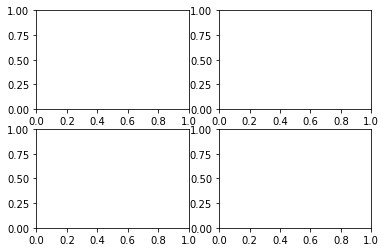

In [11]:
# 1. 그래프가 위치할 기본 틀 만들기
fig = plt.figure()

# 2. 그래프를 그려 넣을 그래프 격자 만들기
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)


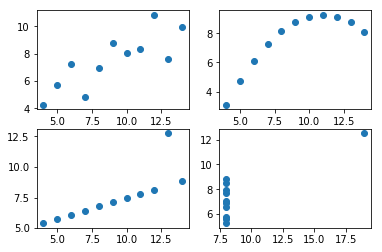

In [12]:
# 격자에 그래프 하나씩 추가
axes1.plot(dataset_1.x, dataset_1.y,'o')
axes2.plot(dataset_2.x, dataset_2.y,'o')
axes3.plot(dataset_3.x, dataset_3.y,'o')
axes4.plot(dataset_4.x, dataset_4.y,'o')

fig

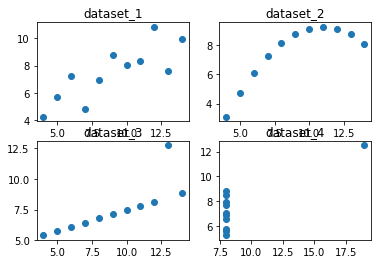

In [13]:
# 그래프 격자에 제목 추가하기
axes1.set_title("dataset_1")
axes2.set_title("dataset_2")
axes3.set_title("dataset_3")
axes4.set_title("dataset_4")

fig

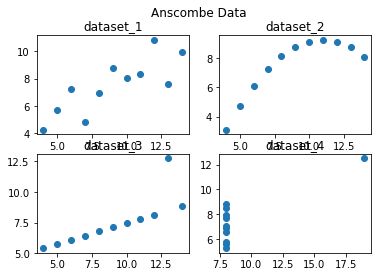

In [14]:
# 기본 틀에도 제목 추가
fig.suptitle("Anscombe Data")
fig

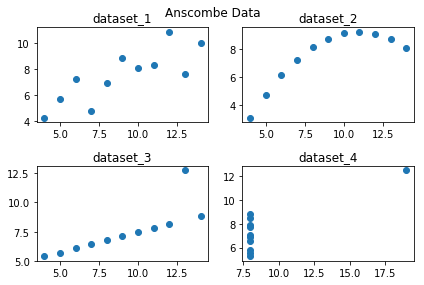

In [16]:
# 각 그래프의 레이아웃 조절
fig.tight_layout()
fig

# 기초 그래프 그리기 - 히스토그램, 산점도, 박스 그래프

In [5]:
# 데이터
tips = sns.load_dataset('tips')
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


Text(0, 0.5, 'Total Bill')

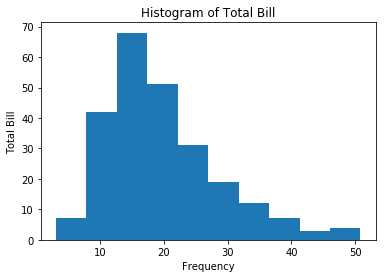

In [18]:
# 히스토그램
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)

axes1.hist(tips['total_bill'], bins=10) # 간격
axes1.set_title('Histogram of Total Bill') # 제목
axes1.set_xlabel('Frequency') # x축 제목
axes1.set_ylabel('Total Bill') # y축 제목

Text(0, 0.5, 'Tip')

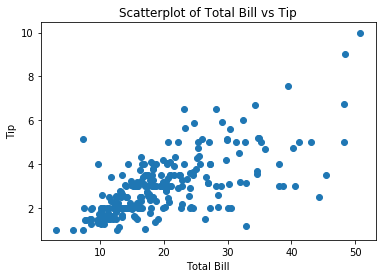

In [19]:
# 산점도 그리기
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)

axes1.scatter(tips.total_bill, tips.tip)

axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

Text(0, 0.5, 'Tip')

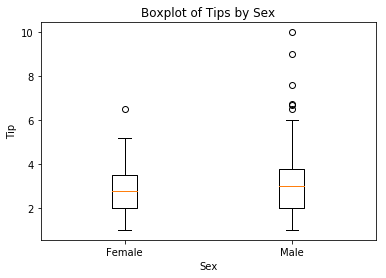

In [20]:
# 박스플롯
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)

axes1.boxplot([tips[tips.sex=='Female'].tip,
             tips[tips.sex=='Male'].tip],
             labels = ['Female','Male'])

axes1.set_title('Boxplot of Tips by Sex')
axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')

# 단변량 그래프 그리기 - 산점도

Text(0, 0.5, 'Tip')

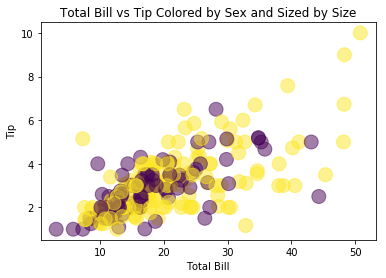

In [8]:
def recode_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1

tips['sex_color'] = tips['sex'].apply(recode_sex)

fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)

axes1.scatter(
    x=tips.total_bill,
    y=tips.tip,
    s=tips.size*0.1, # 점의 크기
    c=tips.sex_color, # 점의 색상
    alpha=0.5 # 투명도
)

axes1.set_title("Total Bill vs Tip Colored by Sex and Sized by Size")
axes1.set_xlabel("Total Bill")
axes1.set_ylabel("Tip")

# 단변량 그래프 그리기 - 히스토그램

In [9]:
# seaborn  라이브러리 자유자재로 사용하기
import seaborn as sns
tips = sns.load_dataset("tips")

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

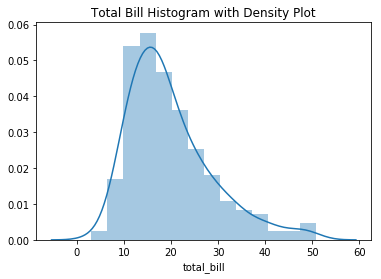

In [11]:
ax = plt.subplots()
ax = sns.distplot(tips.total_bill)
ax.set_title("Total Bill Histogram with Density Plot")

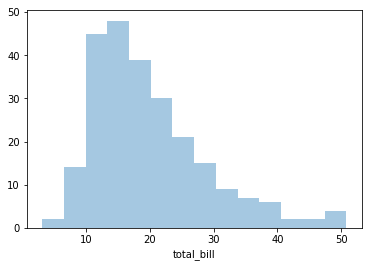

In [12]:
# distplot 그래프는 히스토그램 + 밀집도그래프

# 히스토그램만
ax = sns.distplot(tips.total_bill, kde=False)

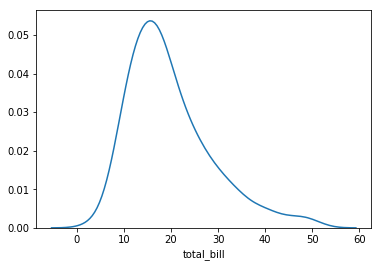

In [13]:
# 밀집도만
ax = sns.distplot(tips.total_bill, hist=False)

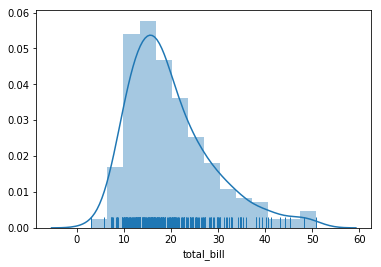

In [15]:
# 양탄자 그래프 추가 : 밀집도
ax = sns.distplot(tips.total_bill, rug=True)

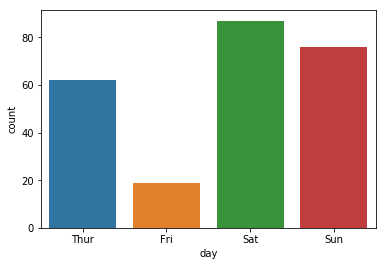

In [16]:
# count 그래프 : 이산값
ax = sns.countplot('day', data=tips)

# 다양한 종류의 이변량 그래프 그리기

Text(0, 0.5, 'Tip')

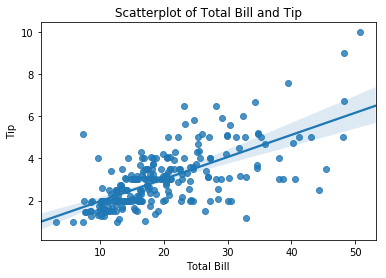

In [17]:
# 산점도 그래프
ax = plt.subplots()
ax = sns.regplot(x='total_bill',y='tip',data=tips)
ax.set_title("Scatterplot of Total Bill and Tip")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")

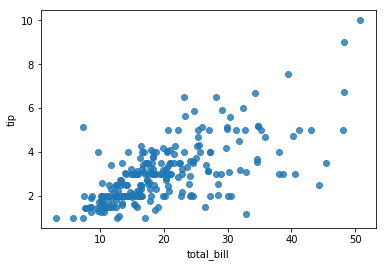

In [18]:
# 산점도 그래프 회귀선 없애기
ax = sns.regplot(x="total_bill",y="tip",data=tips, fit_reg=False)

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

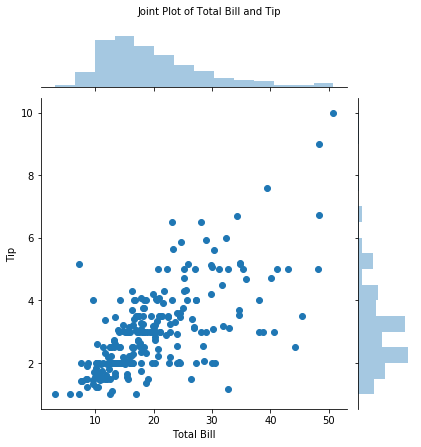

In [20]:
# jointplot : 산점도와 히스토그램
joint  = sns.jointplot(x="total_bill",y="tip",data=tips)
joint.set_axis_labels(xlabel="Total Bill",ylabel="Tip")
joint.fig.suptitle("Joint Plot of Total Bill and Tip", fontsize=10, y=1.03)

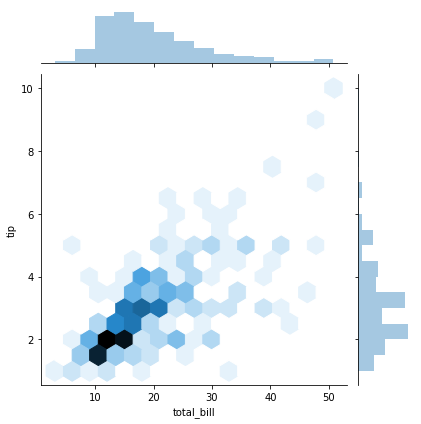

In [21]:
# 육각그래프 hexbin
hexbin = sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

Text(0.5, 1.0, 'Kernel Density Plot of Total Bill and Tip')

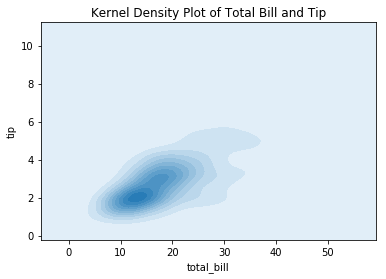

In [25]:
# kdeplot : 이차원 밀집도 그래프
ax = plt.subplots()
ax = sns.kdeplot(data=tips.total_bill, data2=tips.tip, shade=True)
ax.set_title("Kernel Density Plot of Total Bill and Tip")

Text(0.5, 1.0, 'Bar plot of average total bill for time of day')

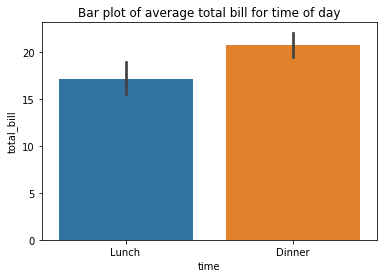

In [26]:
# barplot : 지정한 변수의 평균
ax = plt.subplots()
ax = sns.barplot(x='time',y='total_bill',data=tips)
ax.set_title("Bar plot of average total bill for time of day")

Text(0.5, 1.0, 'Boxplot of total bill by time of day')

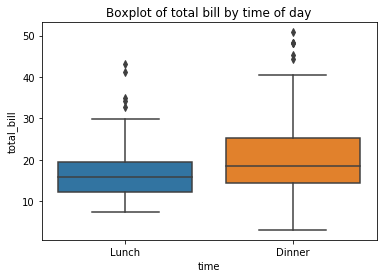

In [27]:
# boxplot : 최솟값, 1분위수, 중간값, 3분위수, 최댓값, 이상치 등 표현
ax = plt.subplot()
ax = sns.boxplot(x='time',y='total_bill',data=tips)
ax.set_title("Boxplot of total bill by time of day")

Text(0.5, 1.0, 'Violin plot of total bill by time of day')

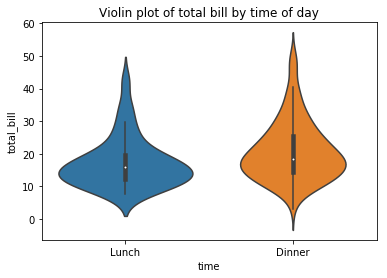

In [29]:
# violinplot : 박스 그래프에 커널 밀도를 추정한 그래프
ax = plt.subplot()
ax = sns.violinplot(x="time",y="total_bill",data=tips)
ax.set_title("Violin plot of total bill by time of day")

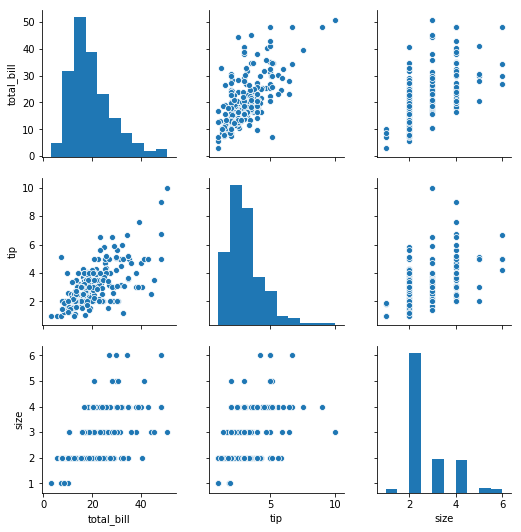

In [30]:
# pairplot : 관계 그래프, 지금까지 설명한 그래프를 종합한 그래프
fig = sns.pairplot(tips)

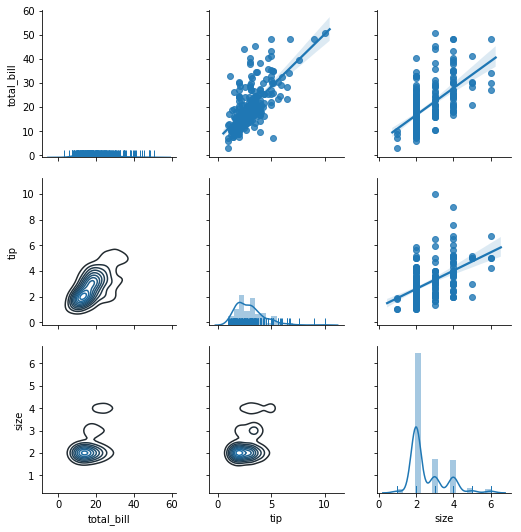

In [32]:
# 관계 그래프 -> 중복된 그래프가 있음. 원하는 위치에 원하는 그래프로 교체하기
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug=True)
plt.show()

### seaborn 라이브러리로 다변량 그래프 그리기

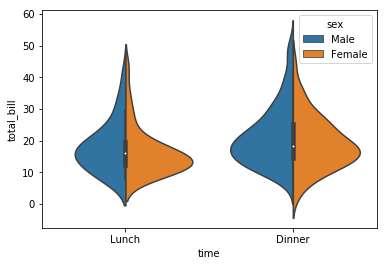

In [34]:
# 바이올린 그래프 - 색상 추가
ax = plt.subplots()
ax = sns.violinplot(x='time',y='total_bill',hue='sex',data=tips, split=True)

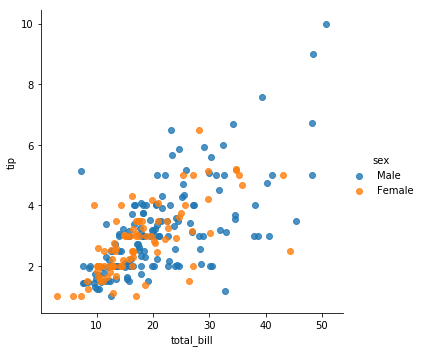

In [36]:
# 산점도 그래프 : 색상 추가
scatter = sns.lmplot(x='total_bill',y='tip',hue='sex',data=tips, fit_reg=False)

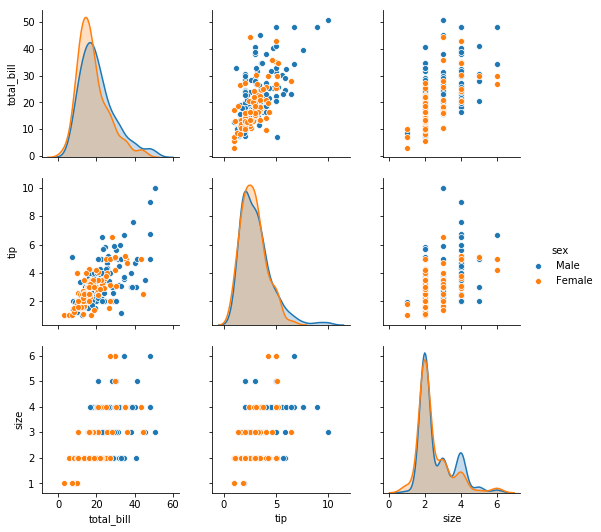

In [37]:
fig = sns.pairplot(tips, hue='sex')

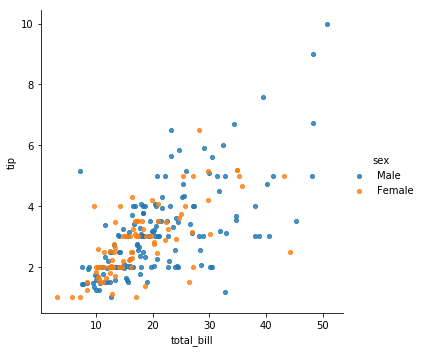

In [39]:
# 산점도 그래프의 크기와 모양 조절
scatter = sns.lmplot(x="total_bill",y="tip",data=tips,fit_reg=False,hue='sex',scatter_kws={'s':tips.size*0.01})

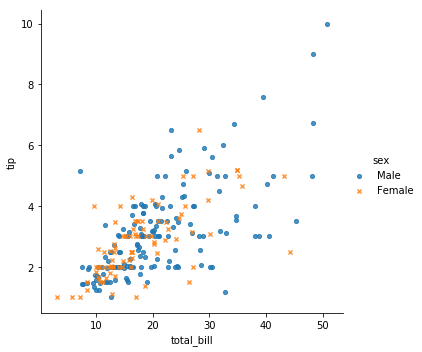

In [41]:
# 산점도 그래프 다른 기호로
scatter = sns.lmplot(x="total_bill",y="tip",data=tips,fit_reg=False, hue='sex',markers=['o','x'],scatter_kws={'s':tips.size*0.01})

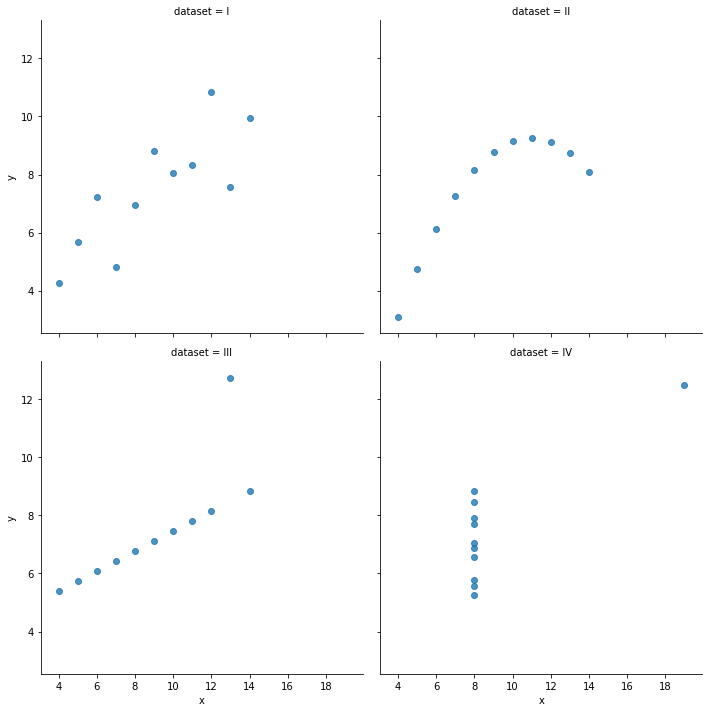

In [43]:
# implot 메소드로 4개의 데이터 그룹에 대한 그래프 한 번에 그리기
anscombe_plot = sns.lmplot(x='x',y='y',data=anscombe,fit_reg=False, col='dataset',col_wrap=2)

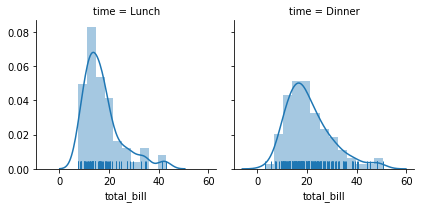

In [44]:
# FacetGrid : 변수 그룹별로 그릴때 편함
facet = sns.FacetGrid(tips, col='time')
facet.map(sns.distplot,'total_bill',rug=True)

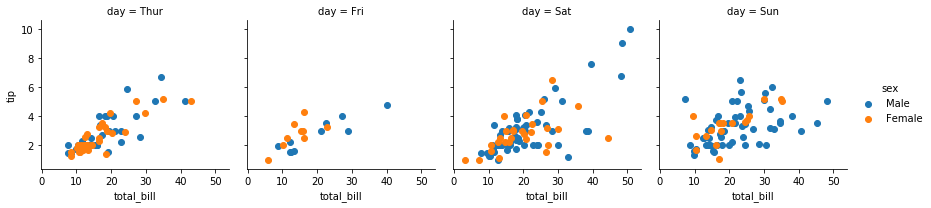

In [45]:
# FacetGrid 다변량 그래프
facet=sns.FacetGrid(tips,col='day',hue='sex')
facet=facet.map(plt.scatter, 'total_bill','tip')
facet=facet.add_legend()

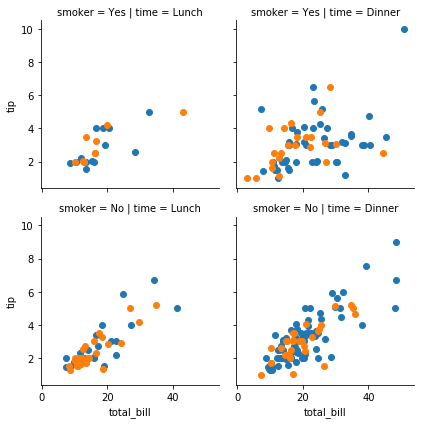

In [46]:
# FacetGrid 더 많은 변수
facet = sns.FacetGrid(tips,col='time',row='smoker',hue='sex')
facet.map(plt.scatter,'total_bill','tip')

# 데이터프레임과 시리즈로 그래프 그리기

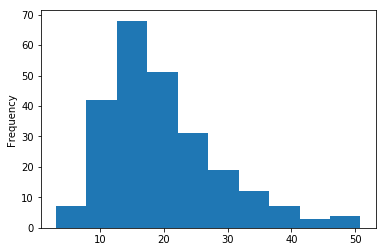

In [47]:
# 히스토그램
ax = plt.subplots()
ax = tips.total_bill.plot.hist()

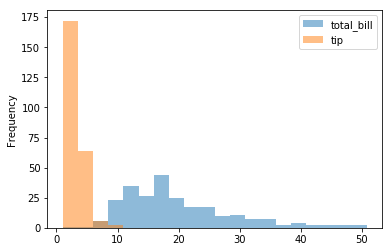

In [48]:
# 2개의 히스토그램
fig, ax = plt.subplots()
ax = tips[['total_bill','tip']].plot.hist(alpha=0.5,bins=20,ax=ax)

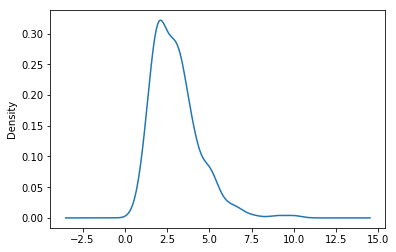

In [49]:
# 밀집도
ax = plt.subplots()
ax = tips.tip.plot.kde()

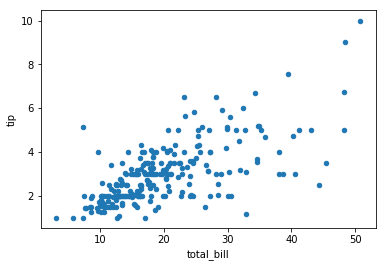

In [50]:
# 산점도
fig, ax = plt.subplots()
ax = tips.plot.scatter(x='total_bill',y='tip',ax=ax)

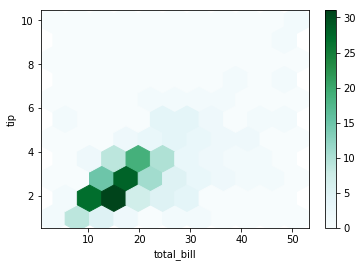

In [53]:
# 육각
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x='total_bill',y='tip',gridsize=10,ax=ax)

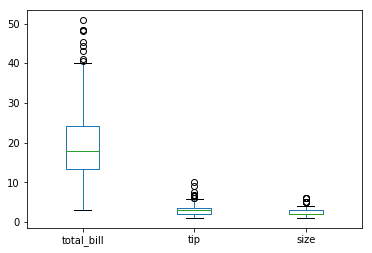

In [54]:
# 박스
fig,ax=plt.subplots()
ax=tips.plot.box(ax=ax)

# 알아두면 좋아요

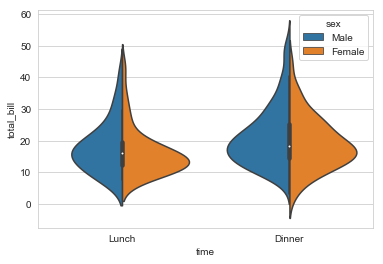

In [56]:
# set_style() : seaborn 라이브러리 스타일 -> darkgrid, whitegrid, dark, white, ticks
sns.set_style('whitegrid')
fig,ax = plt.subplots()
ax = sns.violinplot(x='time',y='total_bill',hue='sex',data=tips,split=True)

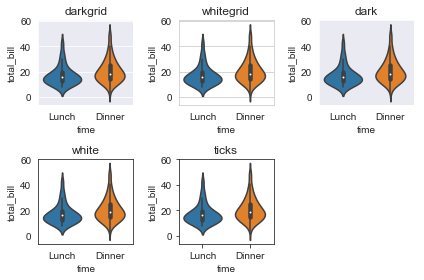

In [57]:
fig = plt.figure()
seaborn_styles =['darkgrid','whitegrid','dark','white','ticks']

for idx, style in enumerate(seaborn_styles):
    plot_positon=idx+1
    with sns.axes_style(style):
        ax = fig.add_subplot(2,3,plot_positon)
        violin = sns.violinplot(x='time',y='total_bill',data=tips,ax=ax)
        violin.set_title(style)

fig.tight_layout()